# ML - AWS Honeypot Attack

1.Which protocols are most used?<br>
2.Most servers that have been attacked?<br>
3.What has been the source of these attacks?<br>
4.When did these attacks happen?

**numpy:** for scientific calculations<br>
**pandas:** bility to create data structures and indexing on rows and columns<br>
**pandas.Series:** It is used to store time series and can be indexing for rows<br>
**pandas.DataFrame:** To store data in two-dimensional format<br>
**seaborn:** To draw two-dimensional diagrams

In [394]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

### - Import the CSV file and take a look at some of the data we have available to us

In [395]:
aws_df = pd.read_csv('./dataset/aws-honeypot.csv')
aws_df.info()
aws_df1 = aws_df.head(10)
aws_df2 = aws_df1.drop(['Unnamed: 15'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     451581 non-null  object 
 1   host         451581 non-null  object 
 2   src          451581 non-null  int64  
 3   proto        451581 non-null  object 
 4   type         44811 non-null   float64
 5   spt          406770 non-null  float64
 6   dpt          406770 non-null  float64
 7   srcstr       451581 non-null  object 
 8   cc           447985 non-null  object 
 9   country      447947 non-null  object 
 10  locale       342112 non-null  object 
 11  localeabbr   331705 non-null  object 
 12  postalcode   86478 non-null   object 
 13  latitude     448112 non-null  float64
 14  longitude    448153 non-null  float64
 15  Unnamed: 15  83 non-null      float64
dtypes: float64(6), int64(1), object(9)
memory usage: 55.1+ MB


In [396]:
data = aws_df.drop(['datetime','src','proto','type','spt','dpt','srcstr','cc'],axis=1)
data

,host,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,groucho-oregon,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,groucho-oregon,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,groucho-oregon,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,groucho-us-east,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,groucho-singapore,France,NaN,NaN,NaN,48.8600,2.3500,NaN
...,...,...,...,...,...,...,...,...
451576,groucho-oregon,Japan,Tokyo-to,13,NaN,35.6850,139.7514,NaN
451577,groucho-eu,China,Anhui Sheng,34,NaN,31.8639,117.2808,NaN
451578,groucho-oregon,United States,California,CA,90017,34.0530,-118.2642,NaN
451579,groucho-tokyo,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN


In [397]:
data_droped_col = data.drop(['country','locale','localeabbr','postalcode','latitude','longitude','Unnamed: 15'],axis=1)
data_droped_col.describe()

,host
count,451581
unique,9
top,groucho-tokyo
freq,126189


## Visualize with catplot

- use 'seaborn' for **visualize(catplot)** the pearson correlation coefficent

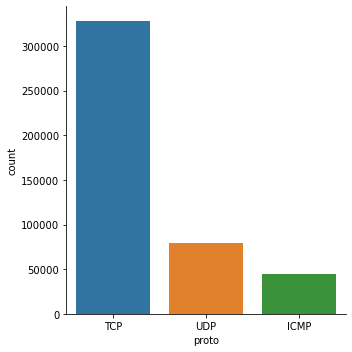

In [398]:
sb.catplot(x='proto',data=aws_df,kind='count')
plt.show()

In [399]:
count = aws_df.proto.value_counts()
category = count.index
category

Index(['TCP', 'UDP', 'ICMP'], dtype='object')

## Visualize with BarPlot

- use 'BarPlot' for **visualize(order by proto)**

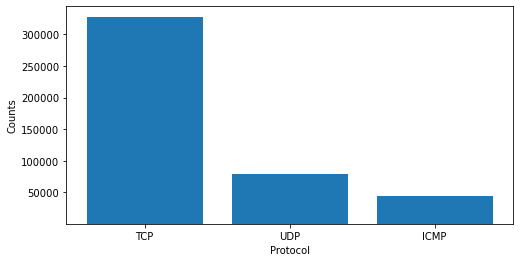

In [400]:
plt.figure(figsize=(8, 4))
plt.bar(category, count)
plt.xlabel('Protocol')
plt.ylabel('Counts')
plt.xticks(['TCP', 'UDP', 'ICMP'])
plt.yticks([50000,100000,150000,200000,250000,300000])
plt.show()

In [401]:
host_list = aws_df['host'].value_counts()
host_list

groucho-tokyo        126189
groucho-oregon        94076
groucho-singapore     78151
groucho-us-east       31779
groucho-norcal        24566
groucho-sydney        24456
groucho-sa            24316
zeppo-norcal          24094
groucho-eu            23954
Name: host, dtype: int64

- **Oregon** (on the West Coast of the United States)
- **US-East** (Eastern United States) = Maine, New Hampshire, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Delaware, Maryland, Virginia, North Carolina, South Carolina, Georgia, and Florida. 
- **Norcal** (Northern California) = San Francisco, San Jose, Oakland, Fresno, Sierra Nevada
- **Sydney** (City of Florida is the Southern most Contiguous State in the United States)
- **SA** (South America)
- **EU** (European Union)

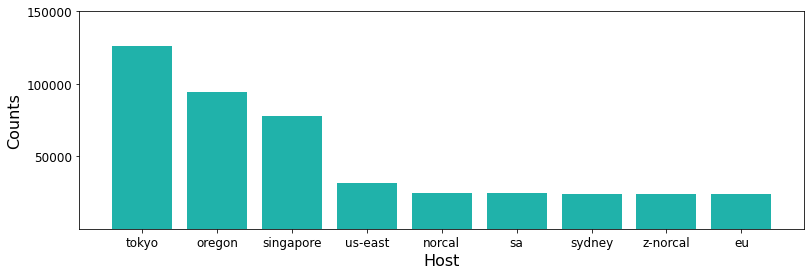

In [402]:
# Bar Plot
count = aws_df.host.value_counts()
host = count.index

plt.figure(figsize=(13, 4))
plt.bar(host, count, color='lightseagreen')

plt.xlabel('Host', fontsize=16)
plt.ylabel('Counts', fontsize=16)

plt.xticks(['groucho-tokyo', 'groucho-oregon', 'groucho-singapore', 'groucho-us-east','groucho-norcal','groucho-sydney','groucho-sa','zeppo-norcal','groucho-eu'],
           ['tokyo','oregon','singapore','us-east','norcal','sa','sydney','z-norcal','eu'], fontsize=12)

plt.yticks([50000,100000,150000], fontsize=12)

plt.show()

In [403]:
aws_df['cc'].value_counts()

CN    191394
US     90005
JP     17204
IR     13042
TW     12150
       ...  
AD         2
ET         2
BM         1
CV         1
BB         1
Name: cc, Length: 176, dtype: int64

In [404]:
aws_df.describe()

,src,type,spt,dpt,latitude,longitude,Unnamed: 15
count,4.515810e+05,44811.000000,406770.000000,406770.000000,448112.000000,448153.000000,83.000000
mean,2.154902e+09,7.514896,18685.461494,6684.258212,36.214115,48.751751,-77.027536
std,1.081011e+09,1.799866,19290.141746,14032.839799,194.251441,91.774739,0.011942
min,1.677725e+07,0.000000,0.000000,0.000000,-43.533300,-175.000000,-77.059600
25%,1.169129e+09,8.000000,6000.000000,445.000000,30.666700,-4.000000,-77.036400
50%,2.031191e+09,8.000000,6000.000000,1433.000000,35.685000,106.000000,-77.036400
75%,3.164988e+09,8.000000,33461.000000,3389.000000,40.455500,118.777800,-77.014600
max,3.758094e+09,13.000000,65535.000000,65500.000000,20076.000000,178.416700,-77.014600


In [405]:
china = aws_df[aws_df['cc']=='CN']

In [406]:
china_new = china.drop(['type','cc','postalcode','localeabbr','Unnamed: 15'],axis=1)
china_new.sort_values(by='datetime',ascending=False)

,datetime,host,src,proto,spt,dpt,srcstr,country,locale,latitude,longitude
431957,8/31/13 9:58,groucho-oregon,3736738315,TCP,6000.0,1433.0,222.186.26.11,China,Jiangsu Sheng,32.0617,118.7778
431959,8/31/13 9:57,groucho-tokyo,1992468994,TCP,6000.0,3389.0,118.194.170.2,China,Beijing Shi,39.9289,116.3883
431948,8/31/13 9:55,groucho-oregon,1962909781,TCP,6000.0,1433.0,116.255.160.85,China,Zhejiang Sheng,27.8456,120.4928
431947,8/31/13 9:54,groucho-oregon,3659281591,TCP,24628.0,1433.0,218.28.52.183,China,Henan Sheng,34.6836,113.5325
431968,8/31/13 9:51,groucho-singapore,993473096,TCP,6000.0,1174.0,59.55.50.72,China,Jiangxi Sheng,28.5500,115.9333
...,...,...,...,...,...,...,...,...,...,...,...
9,2003-03-13 22:14,groucho-singapore,1007884304,TCP,6000.0,1433.0,60.19.24.16,China,Liaoning,41.7922,123.4328
8,2003-03-13 22:12,groucho-oregon,3683919430,TCP,6000.0,1433.0,219.148.38.70,China,Hebei,39.8897,115.2750
7,2003-03-13 22:07,groucho-singapore,3738622573,TCP,6000.0,3306.0,222.214.218.109,China,Sichuan Sheng,30.6667,104.0667
6,2003-03-13 21:59,groucho-oregon,3730416887,TCP,6000.0,1433.0,222.89.164.247,China,Henan Sheng,34.6836,113.5325



### City of China

```Jiangxi Sheng
Henan Sheng
Sichuan Sheng
Hebei
Liaoning
Jiangxi Sheng
Shandong Sheng
Anhui Sheng
,...```

In [407]:
# show data order by locale == 'Jiangxi Sheng
print(china.head(10))
china_locale = aws_df['locale'] == 'Jiangxi Sheng'

            datetime               host         src proto  type      spt  \
0   2003-03-13 21:53     groucho-oregon  1032051418   TCP   NaN   6000.0   
6   2003-03-13 21:59     groucho-oregon  3730416887   TCP   NaN   6000.0   
7   2003-03-13 22:07  groucho-singapore  3738622573   TCP   NaN   6000.0   
8   2003-03-13 22:12     groucho-oregon  3683919430   TCP   NaN   6000.0   
9   2003-03-13 22:14  groucho-singapore  1007884304   TCP   NaN   6000.0   
11  2003-03-13 22:20     groucho-oregon  1965603898   TCP   NaN   9907.0   
19  2003-03-13 22:26      groucho-tokyo  1965603898   TCP   NaN  26180.0   
20  2003-03-13 22:29         groucho-eu  3683780686   UDP   NaN  54790.0   
28  2003-03-13 22:42     groucho-oregon  1017977401   TCP   NaN   6000.0   
30  2003-03-13 22:45     groucho-oregon  2073368071   TCP   NaN   6000.0   

       dpt           srcstr  cc country          locale localeabbr postalcode  \
0   1433.0   61.131.218.218  CN   China   Jiangxi Sheng         36        NaN   
6

In [408]:
print(china.shape)

(191394, 16)


In [409]:
china.head(5)

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,2003-03-13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
6,2003-03-13 21:59,groucho-oregon,3730416887,TCP,NaN,6000.0,1433.0,222.89.164.247,CN,China,Henan Sheng,41,NaN,34.6836,113.5325,NaN
7,2003-03-13 22:07,groucho-singapore,3738622573,TCP,NaN,6000.0,3306.0,222.214.218.109,CN,China,Sichuan Sheng,51,NaN,30.6667,104.0667,NaN
8,2003-03-13 22:12,groucho-oregon,3683919430,TCP,NaN,6000.0,1433.0,219.148.38.70,CN,China,Hebei,13,NaN,39.8897,115.2750,NaN
9,2003-03-13 22:14,groucho-singapore,1007884304,TCP,NaN,6000.0,1433.0,60.19.24.16,CN,China,Liaoning,21,NaN,41.7922,123.4328,NaN


In [410]:
china_dataset=china.drop(['postalcode','srcstr','src','longitude','Unnamed: 15'],axis=1)
print(china_dataset.head(8))

            datetime               host proto  type      spt     dpt  cc  \
0   2003-03-13 21:53     groucho-oregon   TCP   NaN   6000.0  1433.0  CN   
6   2003-03-13 21:59     groucho-oregon   TCP   NaN   6000.0  1433.0  CN   
7   2003-03-13 22:07  groucho-singapore   TCP   NaN   6000.0  3306.0  CN   
8   2003-03-13 22:12     groucho-oregon   TCP   NaN   6000.0  1433.0  CN   
9   2003-03-13 22:14  groucho-singapore   TCP   NaN   6000.0  1433.0  CN   
11  2003-03-13 22:20     groucho-oregon   TCP   NaN   9907.0  1433.0  CN   
19  2003-03-13 22:26      groucho-tokyo   TCP   NaN  26180.0  1433.0  CN   
20  2003-03-13 22:29         groucho-eu   UDP   NaN  54790.0  5060.0  CN   

   country          locale localeabbr  latitude  
0    China   Jiangxi Sheng         36   28.5500  
6    China     Henan Sheng         41   34.6836  
7    China   Sichuan Sheng         51   30.6667  
8    China           Hebei         13   39.8897  
9    China        Liaoning         21   41.7922  
11   China   Ji

In [411]:
china = aws_df[aws_df['cc']=='CN']
china_droped = china.drop(['type','cc','postalcode','localeabbr','Unnamed: 15'],axis=1)
city_pop = china_droped['locale'].value_counts()
city_pop

Jiangsu Sheng               34114
Beijing Shi                 33564
Liaoning                    21346
Anhui Sheng                 13327
Zhejiang Sheng              10616
Guangdong                    9869
Jiangxi Sheng                7728
Shanghai Shi                 6486
Shandong Sheng               5973
Heilongjiang Sheng           3512
Hunan                        3428
Tianjin Shi                  3200
Henan Sheng                  3043
Sichuan Sheng                3014
Fujian                       2866
Hubei                        2795
Hebei                        2394
Jilin Sheng                  2096
Yunnan                       1677
Shaanxi                      1466
Inner Mongolia               1089
Guangxi Zhuangzu Zizhiqu     1032
Chongqing Shi                 894
Xinjiang Uygur Zizhiqu        663
Shanxi Sheng                  494
Gansu Sheng                   473
Guizhou Sheng                 352
Ningxia Huizu Zizhiqu         232
Qinghai Sheng                 172
Hainan        

In [412]:
china = aws_df[aws_df['cc']=='CN']
china_droped_data = china.drop(['type','cc','postalcode','localeabbr','Unnamed: 15'],axis=1)
china_droped_data.head(100)

,datetime,host,src,proto,spt,dpt,srcstr,country,locale,latitude,longitude
0,2003-03-13 21:53,groucho-oregon,1032051418,TCP,6000.0,1433.0,61.131.218.218,China,Jiangxi Sheng,28.5500,115.9333
6,2003-03-13 21:59,groucho-oregon,3730416887,TCP,6000.0,1433.0,222.89.164.247,China,Henan Sheng,34.6836,113.5325
7,2003-03-13 22:07,groucho-singapore,3738622573,TCP,6000.0,3306.0,222.214.218.109,China,Sichuan Sheng,30.6667,104.0667
8,2003-03-13 22:12,groucho-oregon,3683919430,TCP,6000.0,1433.0,219.148.38.70,China,Hebei,39.8897,115.2750
9,2003-03-13 22:14,groucho-singapore,1007884304,TCP,6000.0,1433.0,60.19.24.16,China,Liaoning,41.7922,123.4328
...,...,...,...,...,...,...,...,...,...,...,...
280,2003-04-13 2:57,groucho-singapore,3032095556,TCP,6000.0,1433.0,180.186.27.68,China,Beijing Shi,39.9289,116.3883
281,2003-04-13 3:01,groucho-singapore,3736210160,TCP,11595.0,3389.0,222.178.10.240,China,Chongqing Shi,29.5628,106.5528
285,2003-04-13 3:05,groucho-singapore,3740323306,TCP,5917.0,1433.0,222.240.205.234,China,Hunan,28.1792,113.1136
286,2003-04-13 3:15,groucho-singapore,3546779834,TCP,1024.0,3389.0,211.103.144.186,China,Beijing Shi,39.9289,116.3883


In [413]:
china_locale = aws_df[aws_df['locale']=='Liaoning']
china_locale_dropped = china_locale.drop(['type','cc','postalcode','localeabbr','Unnamed: 15'],axis=1)
china_locale_sorted = china_locale_dropped.sort_values(by='datetime',ascending=False)
china_locale_sorted.head(100)

,datetime,host,src,proto,spt,dpt,srcstr,country,locale,latitude,longitude
433009,8/31/13 20:26,groucho-oregon,1035001150,TCP,6000.0,1433.0,61.176.221.62,China,Liaoning,41.7922,123.4328
432716,8/31/13 17:14,groucho-oregon,3689643694,TCP,9182.0,22.0,219.235.126.174,China,Liaoning,41.7239,123.2017
432368,8/31/13 13:44,groucho-eu,2076058707,TCP,5569.0,1433.0,123.190.36.83,China,Liaoning,41.7922,123.4328
431987,8/31/13 10:13,groucho-tokyo,2947028161,TCP,45753.0,23.0,175.168.20.193,China,Liaoning,41.7922,123.4328
429229,8/30/13 7:24,groucho-oregon,1991939326,TCP,6000.0,1433.0,118.186.148.254,China,Liaoning,41.5703,120.4586
...,...,...,...,...,...,...,...,...,...,...,...
421296,8/27/13 0:26,groucho-tokyo,2945632252,UDP,25416.0,56338.0,175.146.199.252,China,Liaoning,41.7922,123.4328
421297,8/27/13 0:26,groucho-tokyo,2945632252,UDP,25416.0,56338.0,175.146.199.252,China,Liaoning,41.7922,123.4328
421298,8/27/13 0:26,groucho-tokyo,2945632252,UDP,25416.0,56338.0,175.146.199.252,China,Liaoning,41.7922,123.4328
421299,8/27/13 0:26,groucho-tokyo,2945632252,UDP,25416.0,56338.0,175.146.199.252,China,Liaoning,41.7922,123.4328


In [414]:
locale_name = ['Shanghai Shi','Jiangsu Sheng','Fujian','Hubei','Gansu Sheng']
locale_pop = [6486,34114,2866,2795,473]

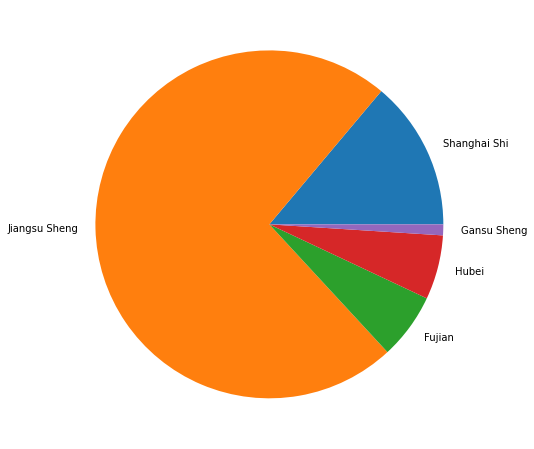

In [415]:
plt.figure(figsize=(8, 8))
plt.pie(locale_pop, labels=locale_name)
plt.show()

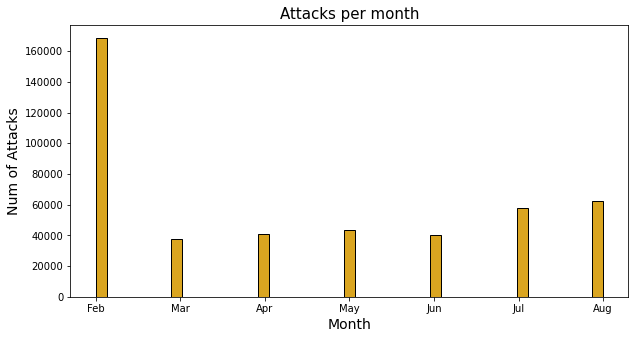

In [416]:
# Cleaning the Date & Time Column
DateTimes = aws_df['datetime'].str.split(' ')
Times = DateTimes.str.get(1)
Dates = DateTimes.str.get(0)

Times = Times.str.replace(':', '')
Hours = [x[:-2] for x in Times]

intTimes =[]
intMonths = []
intHours = []

for hour in Hours:
    integer = int(hour)
    intHours.append(integer)

for time in Times:
    integer = int(time)
    intTimes.append(integer)

for date in Dates:
    month = date[0][0]
    integer = int(month)
    intMonths.append(integer)

plt.figure(figsize=(10, 5))
plt.hist(intMonths, bins='auto', color='goldenrod', edgecolor='k')
plt.xticks([2, 3, 4, 5, 6, 7, 8], ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

plt.xlabel('Month', fontsize=14)
plt.ylabel('Num of Attacks', fontsize=14)
plt.title('Attacks per month', fontsize=15)

plt.show()

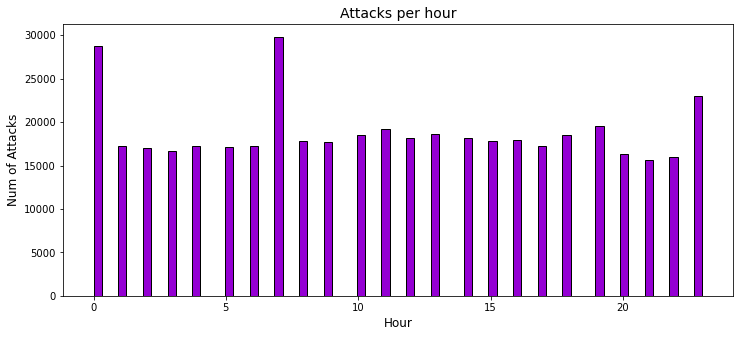

In [417]:
plt.figure(figsize=(12, 5))
#To draw a histogram plot
plt.hist(intHours, bins='auto', color='darkviolet', edgecolor='k')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Num of Attacks', fontsize=12)
plt.title('Attacks per hour', fontsize=14)
plt.show()

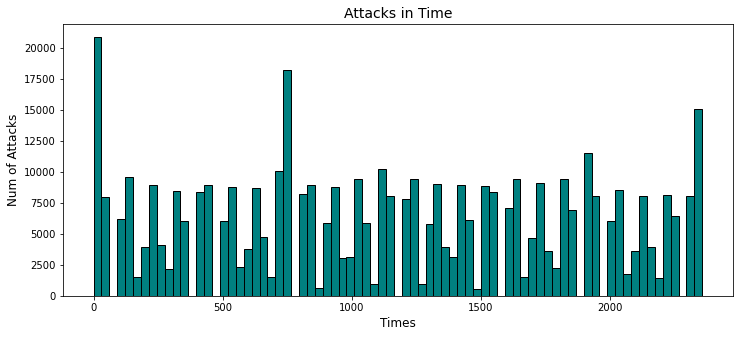

In [418]:
plt.figure(figsize=(12, 5))
plt.hist(intTimes, bins='auto', color='teal', edgecolor='k')
plt.xlabel('Times', fontsize=12)
plt.ylabel('Num of Attacks', fontsize=12)
plt.title("Attacks in Time", fontsize=14)
plt.show()

<Figure size 1584x360 with 0 Axes>

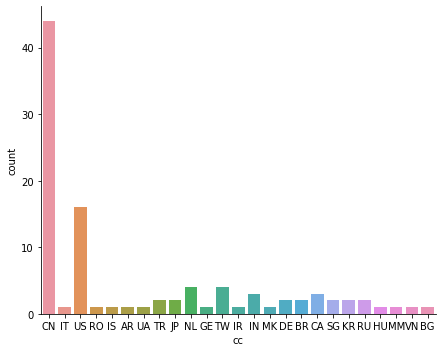

In [419]:
plt.figure(figsize=(22, 5))
cc = aws_df['cc']
countrytime_df = DataFrame(intHours,cc)
sample1 = aws_df.sample(100)
sb.catplot(x='cc',data=sample1,kind='count',height=5, aspect=1.25) #Using seaborn for visualize the pearson correlation coefficent
plt.show()

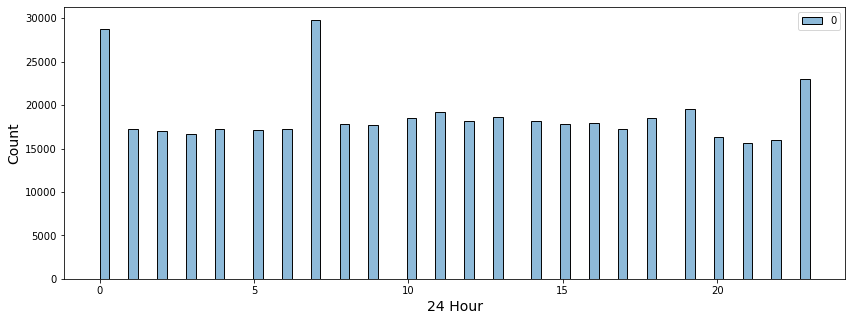

In [420]:
plt.figure(figsize=(14, 5))
plt.xlabel("24 Hour", fontsize=14)
plt.ylabel("Count", fontsize=14)
sb.histplot(countrytime_df)
plt.show()

In [421]:
countrytime_df.describe()

,0
count,451581.000000
mean,11.229870
std,7.003614
min,0.000000
25%,5.000000
50%,11.000000
75%,17.000000
max,23.000000


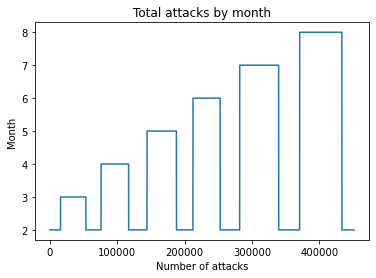

In [422]:
plt.plot(intMonths)
plt.xlabel("Number of attacks")
plt.ylabel("Month")
plt.title("Total attacks by month")
plt.show()

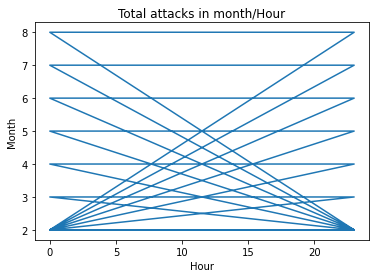

In [423]:
plt.plot(intHours,intMonths)
plt.xlabel("Hour")
plt.ylabel("Month")
plt.title("Total attacks in month/Hour")
plt.show()

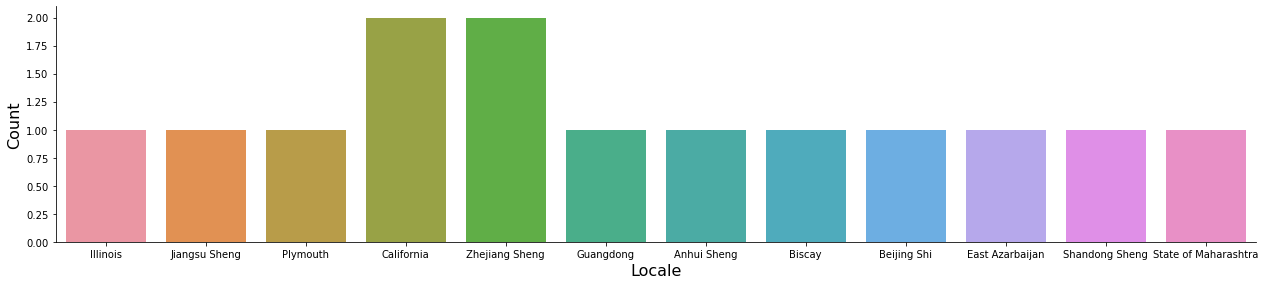

In [424]:
locale = aws_df['locale']
countrytime1_df = DataFrame(intHours,locale)
sample1 = aws_df.sample(14)
sb.catplot(x='locale',data=sample1,kind='count',height=4, aspect=4.4) # Using seaborn for visualize the pearson correlation coefficent
plt.xlabel('Locale', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

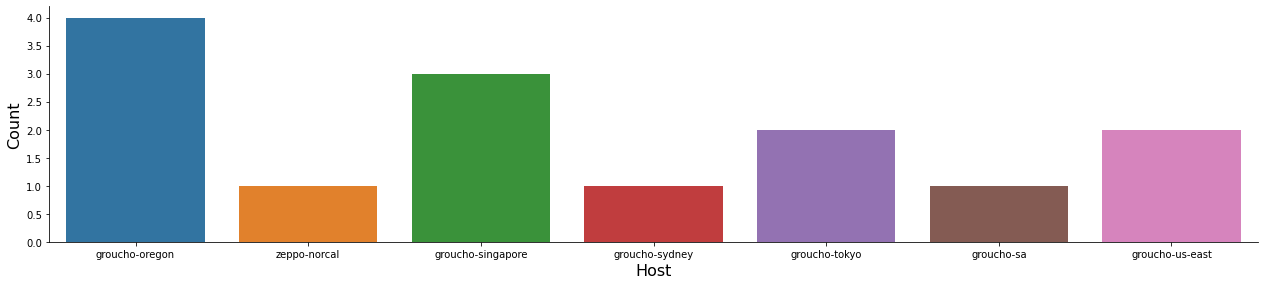

In [425]:
host = aws_df['host']
countrytime1_df = DataFrame(intMonths,host)
sample1 = aws_df.sample(14)
sb.catplot(x='host',data=sample1,kind='count',height=4, aspect=4.4) #Using seaborn for visualize the pearson correlation coefficent
plt.xlabel('Host', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

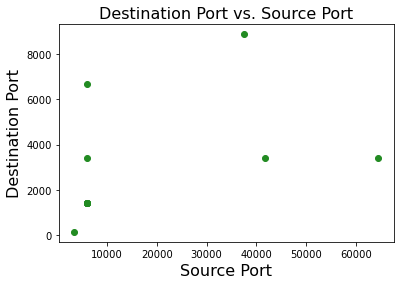

In [426]:
# plt.scatter == To plot the graph as a point
plt.scatter(x=sample1['spt'],y=sample1['dpt'],color='forestgreen')
plt.xlabel("Source Port", fontsize=16)
plt.ylabel("Destination Port", fontsize=16)
plt.title("Destination Port vs. Source Port", fontsize=16)
plt.show()

## ECDF = Empirical cumulative distribution function
- This graph shows the cumulative distribution of our data
- np.sort() = Sort the information it receives and put it inside the variable
- np.arange(1, n+1) / n = It makes numbers always show between zero and one

In [427]:
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n 
    return x,y

In [428]:
x, y = ECDF(aws_df.src)

In [429]:
x

array([  16777254,   16777254,   16884334, ..., 3758092850, 3758093844,
       3758093844])

In [430]:
y

array([2.21444215e-06, 4.42888430e-06, 6.64332645e-06, ...,
       9.99995571e-01, 9.99997786e-01, 1.00000000e+00])

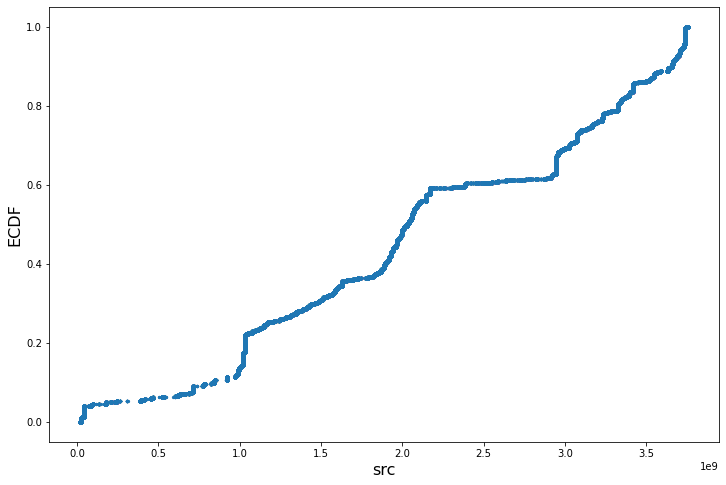

In [431]:
# plt.figure(figsize=(260, 230))
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=5)
plt.margins(0.05)
plt.xlabel('src', fontsize=16)
plt.ylabel('ECDF', fontsize=16)
plt.show()

## use Pandas for calculate the pearson correlation coefficent

In [432]:
num_var = aws_df.drop(['type','cc','src','latitude','longitude','Unnamed: 15'], axis=1)
num_var
corr = num_var.corr()
corr

,spt,dpt
spt,1.000000,0.148483
dpt,0.148483,1.000000


## Visualize with Heatmap
- ### Using seaborn for visualize the pearson correlation coefficent

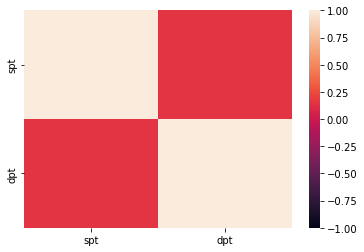

In [433]:
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=+1)
plt.show()

### Calculate Mean

In [434]:
np.mean(aws_df.src)

2154901582.010005

### Calculate Median

In [435]:
np.median(aws_df.src)

2031191236.0

### Percentile = 25% 50% 75%

In [436]:
np.percentile(aws_df.src, [25, 50, 75]) #25 percent, 50 percent, 75 percent

array([1.16912913e+09, 2.03119124e+09, 3.16498842e+09])

# Calculate Variance
## - First Method

In [437]:
np.var(aws_df.src)

1.1685818567316088e+18

## - Second Method

In [439]:
diff = aws_df.src - np.mean(aws_df.src)
diff_sq = diff ** 2
var = np.mean(diff_sq)
var

1.1685818567316088e+18

# Standard deviation

In [440]:
np.std(aws_df.src)

1081009646.9188464

- A measure to check the changes of two values relative to each other
- Obtaining a positive covariance value indicates a direct relationship between two parameters, and a negative covariance indicates an inverse relationship.

# Calculate Covariance

In [441]:
np.cov(aws_df.src)

array(1.16858444e+18)

In [ ]:
plt.figure(figsize=(8, 8))
sb.pairplot(aws_df)
plt.show()

<Figure size 576x576 with 0 Axes>

### - use scipy for calculate the pearson correlation coefficent

In [390]:
aws_df.head(4)

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,2003-03-13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,2003-03-13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,2003-03-13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,2003-03-13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN


In [391]:
help(pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

In [392]:
from pydoc import help
from scipy import stats 
pearson_coefficent, p_value = stats.pearsonr(aws_df["src"],aws_df["src"])
pearson_coefficent

1.0

In [393]:
from reportlab.pdfgen import canvas
my_canvas = canvas.Canvas("aws-honeypot-attack.pdf")
my_canvas.drawString(100, 750, "Welcome to Reportlab!")
my_canvas.save()